In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models 

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# 📥 Load the data

In [2]:
with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

In [3]:
new_labels = []
for i in labels:
    new_labels.append([int(i)])
labels = np.array(new_labels)

labels = labels.astype(np.float32)
images = images.astype(np.float32)

train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
X_train, y_train, X_test, y_test = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (15962, 256, 256, 3)
y_train shape: (15962, 1)
X_test shape: (1774, 256, 256, 3)
y_test shape: (1774, 1)


# 🖼 Data Visualization

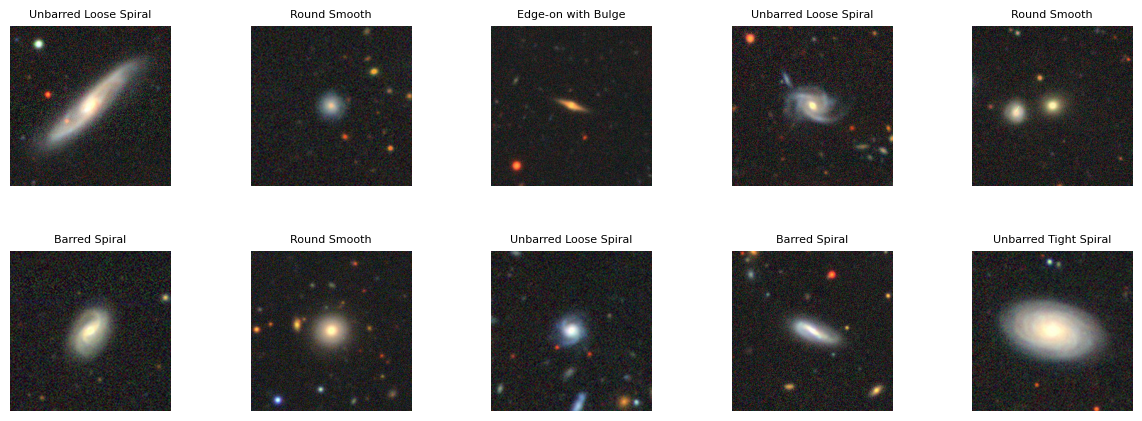

In [4]:
# Define the labels of the dataset
labels = ['Disturbed', 'Merging', 'Round Smooth', 'In-between Round Smooth', 'Cigar-round Smooth', \
          'Barred Spiral', 'Unbarred Tight Spiral', 'Unbarred Loose Spiral', 'Edge-on Without Bulge', \
          'Edge-on with Bulge']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 2

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,5))

axes = axes.ravel()

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow((X_train[index]).astype(np.uint8))
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

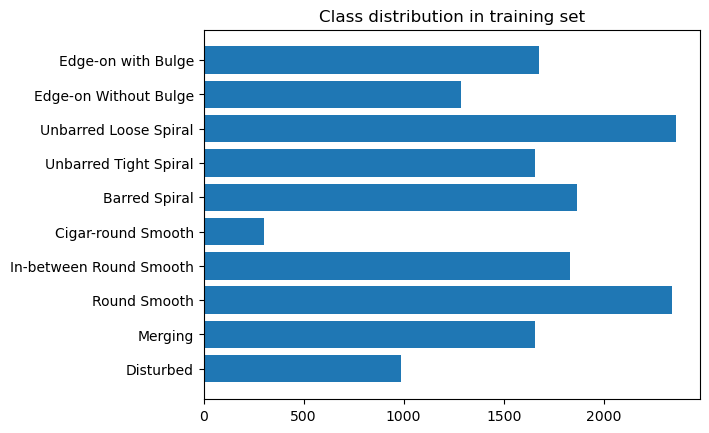

In [5]:
classes_name = ['Disturbed', 'Merging', 'Round Smooth', 'In-between Round Smooth', 'Cigar-round Smooth', \
          'Barred Spiral', 'Unbarred Tight Spiral', 'Unbarred Loose Spiral', 'Edge-on Without Bulge', \
          'Edge-on with Bulge']

classes, counts = np.unique(y_train, return_counts=True)

plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

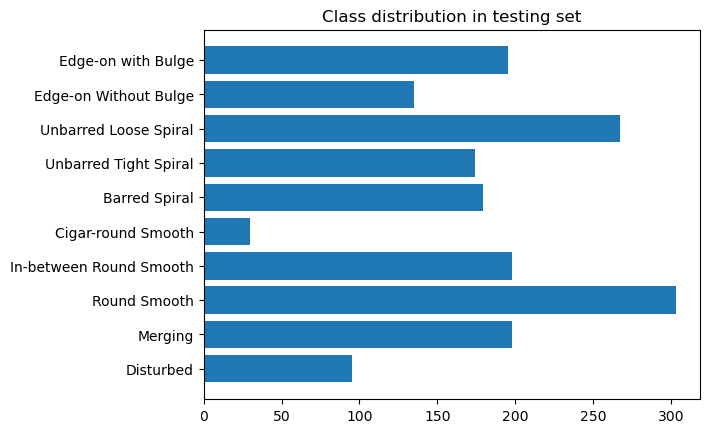

In [6]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

# 🔄 Data Preprocessing

In [7]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# 🤖 Model Building

In [8]:
def model_setup():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.summary()

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10)) #10
    
    model.summary()
    # Adam is the best among the adaptive optimizers in most of the cases
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
def model_fit(model):
    history = model.fit(X_train, y_train, epochs=10, 
                        validation_data=(X_test, y_test))
    return history

def show_accuracy():
    plt.figure(figsize=(7,5))
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.savefig("show_accurace.png")
    return history

def show_predict(i):
    plt.figure(figsize=(5,5))
    plt.imshow(X_test[i])
    plt.title('actual='+classes_name[int(ca[i])] + ', pred=' + classes_name[int(cs[i])])
    plt.savefig("Results/show_predict_" + str(i) + ".pdf")

In [9]:
model = model_setup()

/Users/efg5335/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    14,745,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,802,634 (56.47 MB)

 Trainable params: 14,802,634 (56.47 MB)

 Non-trainable params: 0 (0.00 B)

## Data Augmentations

In [10]:
history = model_fit(model)

Epoch 1/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 322s 642ms/step - accuracy: 0.2078 - loss: 2.1344 - val_accuracy: 0.4025 - val_loss: 1.6413
Epoch 2/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 317s 634ms/step - accuracy: 0.4534 - loss: 1.5265 - val_accuracy: 0.5524 - val_loss: 1.2994
Epoch 3/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 314s 630ms/step - accuracy: 0.5967 - loss: 1.1532 - val_accuracy: 0.5671 - val_loss: 1.2852
Epoch 4/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 315s 632ms/step - accuracy: 0.7027 - loss: 0.8595 - val_accuracy: 0.5671 - val_loss: 1.3683
Epoch 5/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 313s 628ms/step - accuracy: 0.8117 - loss: 0.5613 - val_accuracy: 0.5333 - val_loss: 1.7595
Epoch 6/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 322s 645ms/step - accuracy: 0.9030 - loss: 0.3101 - val_accuracy: 0.5175 - val_loss: 2.2939
Epoch 7/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 340s 681ms/step - accuracy: 0.9477 - loss: 0.1790 - val_accuracy: 0.4966 - val_loss: 2.9030
Epoch 8/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 344s 688ms/step - accuracy: 0.9684 -

# 📊 Model Evaluation

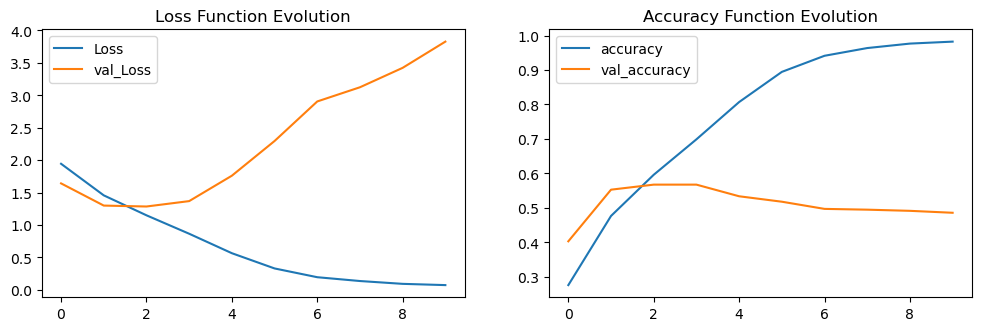

In [11]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.savefig("Results/evolution.pdf")

56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step


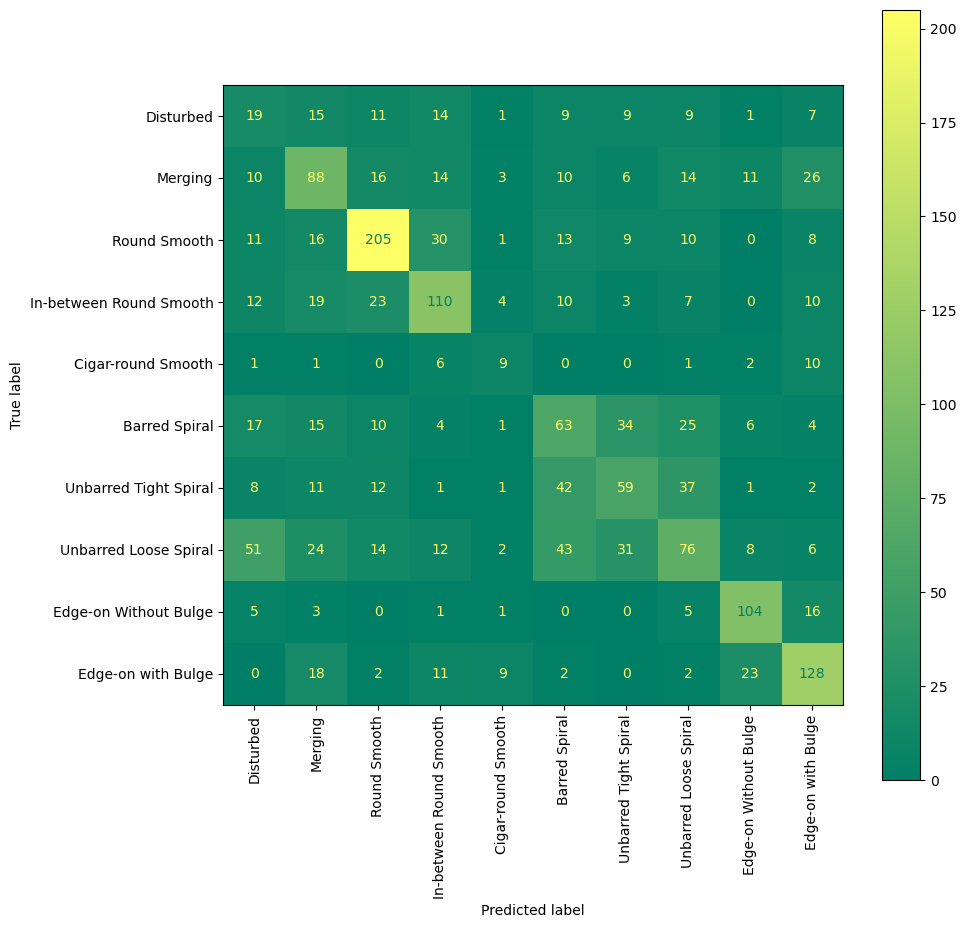

In [12]:
yp = model.predict(X_test)
cs = np.argmax(yp, axis = 1)
ca = y_test.reshape(len(cs))

cm = confusion_matrix(y_test, cs)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
plt.savefig("Results/confusion_matrix.pdf")
plt.show()

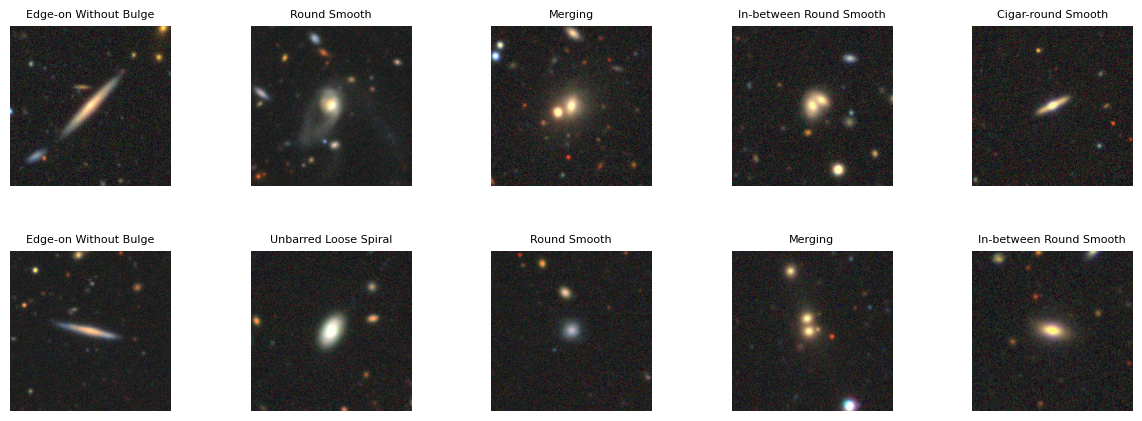

In [13]:
# Define the labels of the dataset
labels = ['Disturbed', 'Merging', 'Round Smooth', 'In-between Round Smooth', 'Cigar-round Smooth', \
          'Barred Spiral', 'Unbarred Tight Spiral', 'Unbarred Loose Spiral', 'Edge-on Without Bulge', \
          'Edge-on with Bulge']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 2

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,5))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index])
    label_index = int(cs[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.savefig("Results/grid_predicted.pdf")

## Test on one image

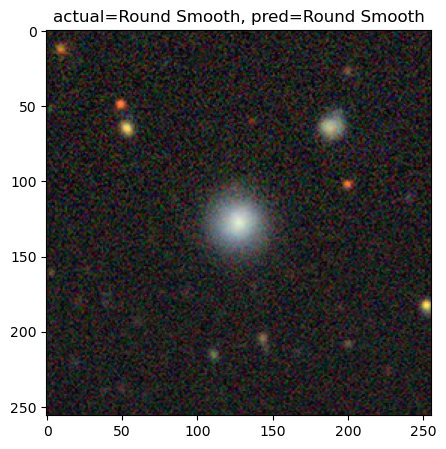

In [15]:
show_predict(0)

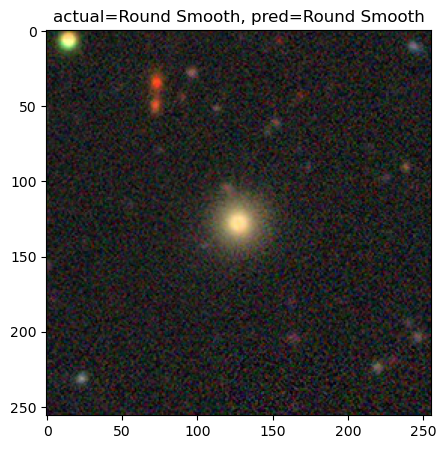

In [16]:
show_predict(10)